In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model

import pickle
%matplotlib inline

In [158]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [159]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [64]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [66]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [67]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# EDA

In [5]:
df.shape

(32560, 15)

# We have 32560 rows and 15 columns in dataset

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# We have mixture of int and object type value in all independent variables and Income is our target variable.

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# there are null values in the dataset which is filled with ? but here we don't see any missing data.

In [68]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [12]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


from the above table we get the count,mean,std,min,max of our target variable.

# Value count function

In [71]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [73]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [74]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [75]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [76]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [77]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [78]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [79]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [80]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [110]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

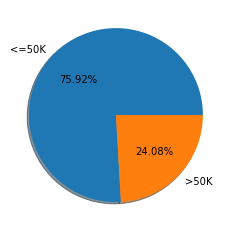

In [81]:
labels = '<=50K', '>50K'

fig, ax = plt.subplots()
ax.pie(df['Income'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=True)

plt.show()

# Income less than 50K is 76% and Income more than 50K is 24%.

# Univariate analysis

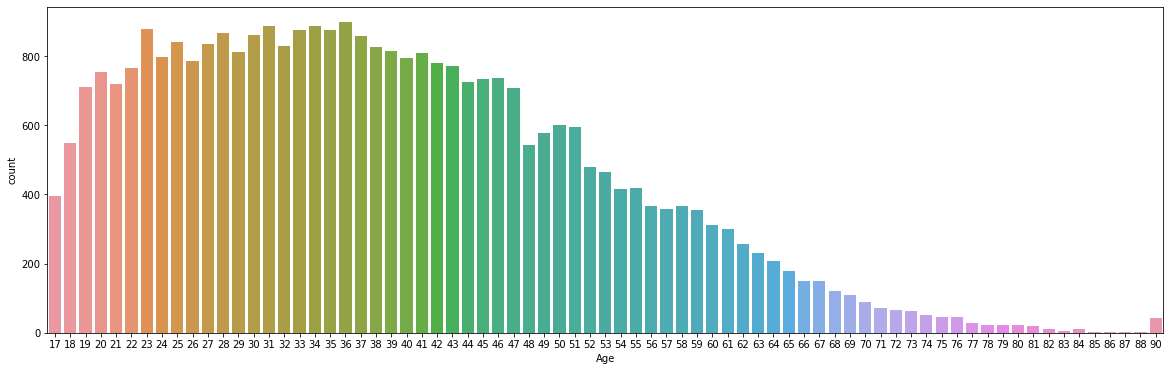

In [92]:
plt.figure(figsize=(20,6))
sn.countplot(df['Age'])
plt.show()

Age between 23 to 36 years are highest.

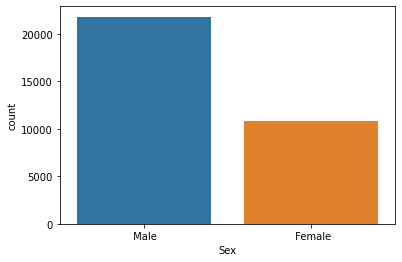

In [93]:
plt.figure(figsize=(6,4))
sn.countplot(df['Sex'])
plt.show()

Male is around 25000 and female is around 12000.

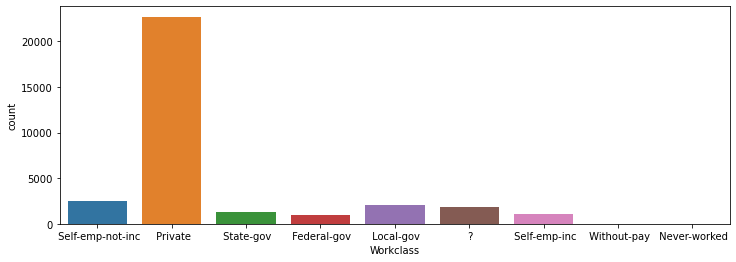

In [94]:
plt.figure(figsize=(12,4))
sn.countplot(df['Workclass'])
plt.show()

# Bivariate analysis

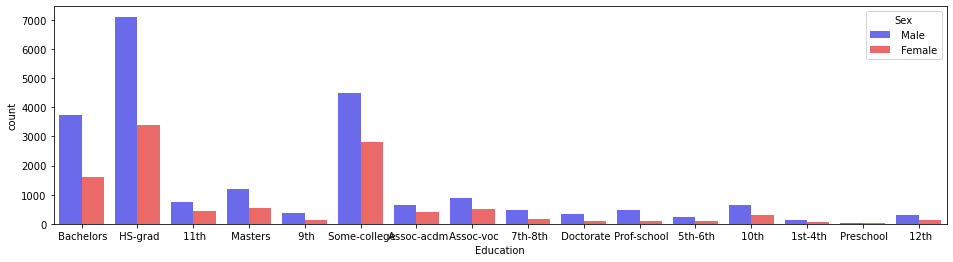

In [138]:
plt.figure(figsize=(16,4))
sn.countplot(df['Education'], hue='Sex', data=df, palette='seismic');
plt.show()

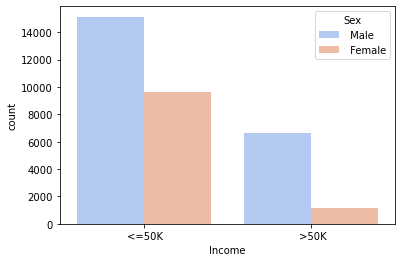

In [83]:
plt.figure(figsize=(6,4))
sn.countplot(df['Income'], hue='Sex',  data=df, palette='coolwarm');
plt.show()

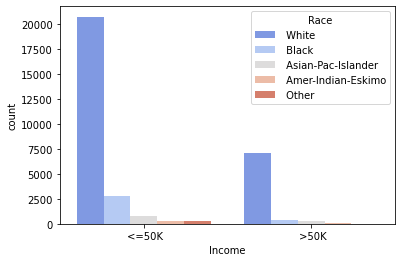

In [84]:
plt.figure(figsize=(6,4))
sn.countplot(df['Income'], hue='Race',  data=df, palette='coolwarm');
plt.show()

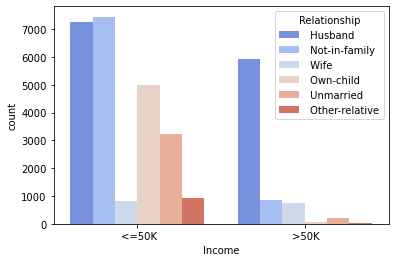

In [91]:
plt.figure(figsize=(6,4))
sn.countplot(df['Income'], hue='Relationship',  data=df, palette='coolwarm');
plt.show()

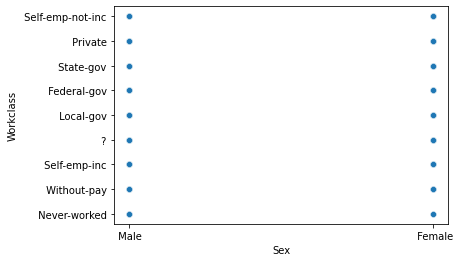

In [30]:
plt.figure(figsize=(6,4))
sn.scatterplot(x ='Sex', y ='Workclass', data = df, palette = "inferno")
plt.show()

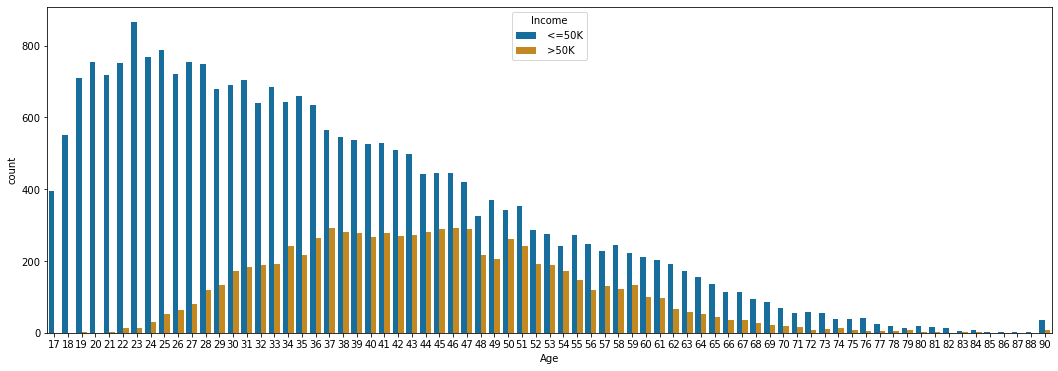

In [52]:
plt.figure(figsize=(18,6))
sn.countplot(x='Age', hue='Income',data=df, palette='colorblind')
plt.show()

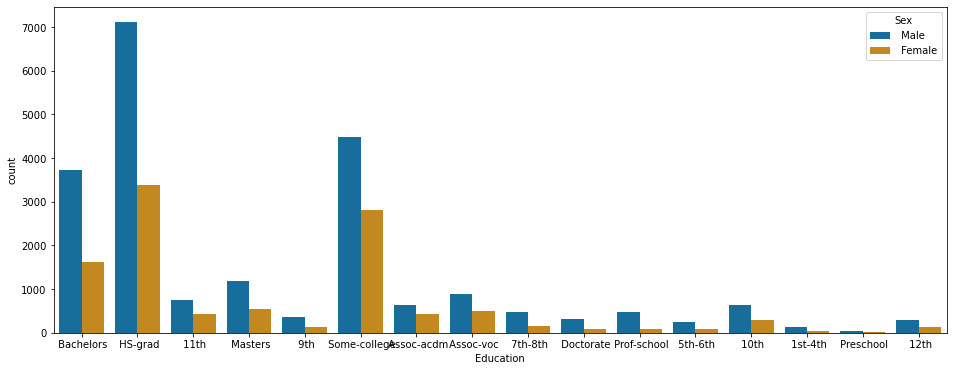

In [60]:
plt.figure(figsize=(16,6))
sn.countplot(x='Education', hue='Sex',data=df, palette='colorblind')
plt.show()

# Filling ? values

replace the values with mode

In [160]:
df['Workclass'] = df['Workclass'].replace('?', 'Private')
df['Occupation'] = df['Occupation'].replace('?', 'Prof-specialty')
df['Native_country'] = df['Native_country'].replace('?', 'United-States')

In [105]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [109]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Feature Engineering

In [161]:
# education Category
df.Education= df.Education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.Education = df.Education.replace('HS-grad', 'high school')
df.Education = df.Education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.Education = df.Education.replace('Bachelors', 'undergrad')
df.Education = df.Education.replace('Masters', 'grad')
df.Education = df.Education.replace('Doctorate', 'doc')

In [162]:
#martial status
df['Marital_status']= df['Marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['Marital_status']= df['Marital_status'].replace(['Never-married'], 'not-married')
df['Marital_status']= df['Marital_status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [163]:
# income
df.Income = df.Income.replace('<=50K', 0)
df.Income = df.Income.replace('>50K', 1)

In [118]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [164]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [165]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [121]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


# Multivariant analysis

<Figure size 576x288 with 0 Axes>

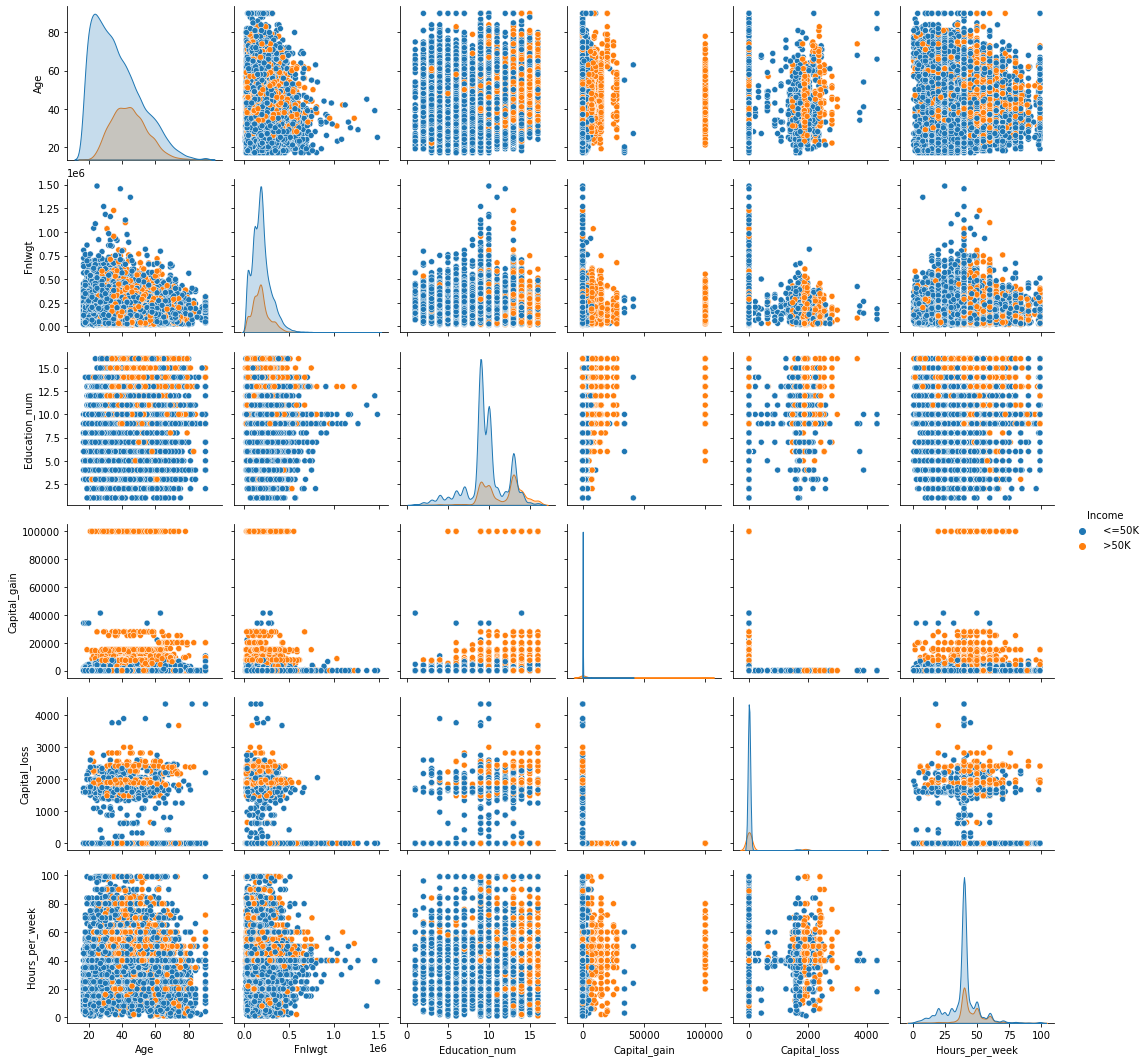

In [166]:
plt.figure(figsize=(8,4))
sn.pairplot(df,hue="Income")
plt.show()

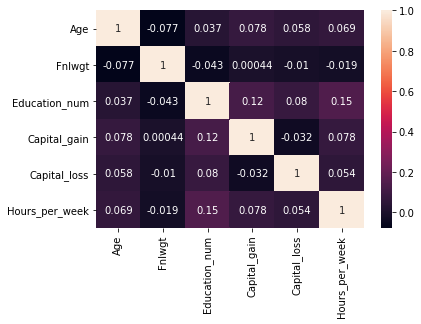

In [167]:
sn.heatmap(df.corr(), annot=True);

# Histogram

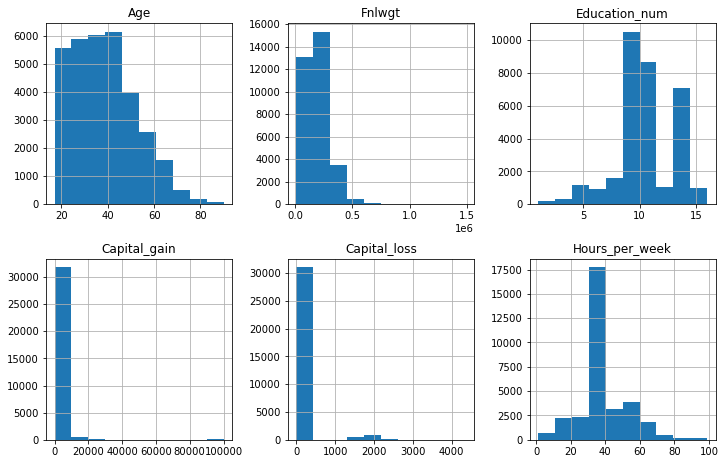

In [124]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

# Outliers

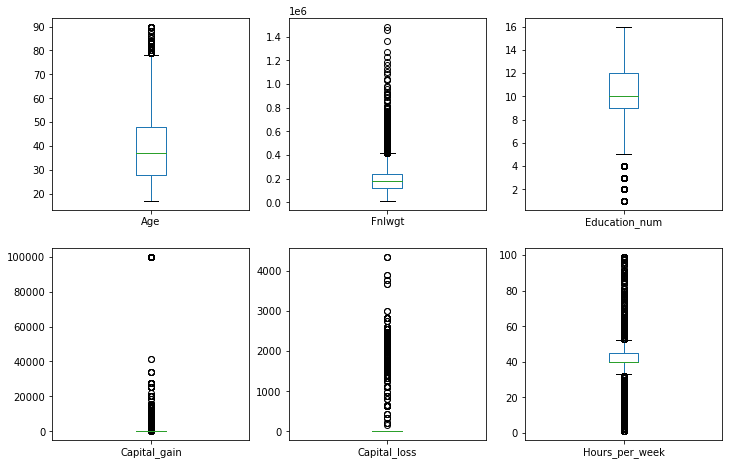

In [125]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

In [169]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

# Data Preprocessing

In [170]:
X= df.drop(['Income'], axis=1)
y = df['Income']

In [171]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [172]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [173]:
ss= StandardScaler().fit(df1.drop('Income', axis=1))

In [174]:
X= ss.transform(df1.drop('Income', axis=1))
y= df['Income']

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.824
Acc on test data: 0.825


In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Decision Tree Classifier

In [192]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
pred = DTC.predict(X_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      7412
        >50K       0.61      0.62      0.62      2356

    accuracy                           0.81      9768
   macro avg       0.74      0.75      0.75      9768
weighted avg       0.81      0.81      0.81      9768



# for DTC,accuracy is 81%

In [193]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
pred = RFC.predict(X_test)
acc=classification_report(y_test, pred)
print(acc)


              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7412
        >50K       0.76      0.63      0.68      2356

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



# for RFC,accuracy is 86%

In [194]:
SV = SVC()
SV.fit(X_train, y_train)
pred = SV.predict(X_test)
acc=classification_report(y_test, pred)
print(acc)


              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      7412
        >50K       0.77      0.55      0.64      2356

    accuracy                           0.85      9768
   macro avg       0.82      0.75      0.77      9768
weighted avg       0.84      0.85      0.84      9768



for SVC,accuracy is 85%

# for DTC,accuracy is 81%
# for RFC,accuracy is 86%
# for SVC,accuracy is 85%

In [195]:
from sklearn.model_selection import cross_val_score

In [196]:
print(cross_val_score(DTC,X,y,cv=5).mean())

0.80752457002457


In [197]:
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8562653562653562


In [199]:
print(cross_val_score(SV,X,y,cv=5).mean())

0.8495393120393121


# Cross validation of 
# DTC - 80%
# RFC - 86%
# SVC - 84%

        Decision Tree
# DTC -  81% - 80% = 1
# RFC -  86% - 86% = 0
# SVC -  85% - 84% = 1

# Random Forest Classifier is the best Model.

In [205]:
#Confusion Matrix and accuracy score for the model on the test data

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, SV.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing accuracy = {}'.format( (TP + TN)/(TP + TN + FN + FP)))


[[7020  392]
 [1059 1297]]
Model Testing accuracy = 0.8514537264537264


In [206]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [213]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [214]:
probs = model.predict_proba(X_test)

In [215]:
probs = probs[:, 1]

In [216]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.91


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [ ]:
plot_roc_curve(fpr, tpr)

# Hyperparameter tuning

In [222]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}



In [225]:
rfr = RandomForestClassifier(random_state = 1)

grid = GridSearchCV(estimator = RFC, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)



In [226]:
grid.fit(X_train, y_train);

print(grid.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 11}


In [227]:
print(grid.score(X_test, y_test))

0.8615888615888616


In [236]:
Final_mod = RandomForestClassifier(criterion= 'gini', max_depth= 5,max_features='auto',n_estimators=200)
Final_mod.fit(X_train, y_train)
pred = Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

85.28869778869779


# Saving the model

In [237]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

# Loading the model

In [238]:
mod=joblib.load("FinalModel.pkl")

In [239]:
print(mod.predict(X_test))

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']
